In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as random

from calibration_util import *
from kendall_errors import *
%matplotlib inline
%precision 3

/home/caitlin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'%.3f'

In [2]:
data = generate(1000,5,0.2,99)
data['y_pred'] = add_error(data, 0.5, 0.)['y']
data.head()

,x0,x1,x2,x3,x4,y,g,y_pred
341,-1.897510,-1.926044,-1.511468,-2.280682,-0.545986,0.000000,0.0,0.000000
957,-1.093064,-0.590733,-2.509643,-0.140688,-1.877154,0.107379,1.0,0.107458
382,-1.787527,-2.023447,-2.398719,1.825149,-0.885930,0.113730,1.0,0.121660
822,-0.704922,-1.604984,-1.903589,-1.496792,0.008797,0.120433,0.0,0.069403
915,-0.277001,-0.802967,-1.862609,-1.642133,-1.321887,0.127985,1.0,0.133257


In [3]:
def add_error_under(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(1-scale, 1.05)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1.05)
    #data2.sort_values('y', inplace=True)   
    return data2

In [4]:
def add_error_over(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.9, 1+scale)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1.05)
    #data2.sort_values('y', inplace=True)   
    return data2

In [5]:
def add_error_under_over(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(1-scale, 1.05)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1+scale)
    #data2.sort_values('y', inplace=True)   
    return data2

In [6]:
def plot_all(data, filename): 
    plt.figure(figsize=(14, 4,))
    plt.subplot(131) # equivalent to: plt.subplot(2, 2, 1)
    
    e0,e1 = sliding_kendall_parity(data, window=350, step=10)
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.ylim([0,1])
    plt.title("Parity")

    plt.subplot(132) # equivalent to: plt.subplot(2, 2, 1)
    e0,e1 = sliding_kendall_cal2(data, window=350, step=10)
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.ylim([0,1])
    plt.title("Calibration")

    plt.subplot(133) # equivalent to: plt.subplot(2, 2, 1)
    e0,e1 = sliding_kendall_eq(data, window=350, step=10)
    plt.ylim([0,1])
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.title("Equality")
#     plt.show()
    plt.savefig(filename, bbox_inches="tight")

    synth_errs = diagnose_k(data, w=350, s=10)
    print(synth_errs.round(2))
    print("")
    print("")

In [7]:
# plt.rcParams['figure.figsize'] = (16, 4)
# data = generate(1000,5,0.2,99)
# print("Group 0 (red) underestimated")
# data['y_pred'] = add_error_under(data, 0.1, 0.)['y']
# plot_all(data, "under1.png")
# data['y_pred'] = add_error_under(data, 0.5, 0.)['y']
# plot_all(data, "under5.png")
# data['y_pred'] = add_error_under(data, 0.75, 0.)['y']
# plot_all(data, "under75.png")

In [8]:
# print("Group 1 (blue) overestimated")
# data['y_pred'] = add_error_over(data, 0.1, 0.)['y']
# plot_all(data, "over1.png")
# data['y_pred'] = add_error_over(data, 0.5, 0.)['y']
# plot_all(data, "over5.png")
# data['y_pred'] = add_error_over(data, 0.75, 0.)['y']
# plot_all(data, "over75.png")

In [9]:
# print("Group 0 (red) underestimated, Group 1 (blue) overestimated")
# data['y_pred'] = add_error_under_over(data, 0.1, 0.)['y']
# plot_all(data, "over_under1.png")
# data['y_pred'] = add_error_under_over(data, 0.5, 0.)['y']
# plot_all(data, "over_under5.png")
# data['y_pred'] = add_error_under_over(data, 0.75, 0.)['y']
# plot_all(data, "over_under75.png")

In [10]:
#normalized version
# def sliding_kendall_parity(df, window, step):
#     df.sort_values('y_pred', ascending=False, inplace=True)
#     err0=[]
#     err1=[]
#     start=0
#     end=window
#     while end<len(df):
#         vals = df.iloc[range(start,end)]
#         g = np.array(vals[['y_pred', 'g']])
#         p = pairs(len(g)) - pairs(len(vals[vals['g']==1])) - pairs(len(vals[vals['g']==0]))
#         e0 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_parity_0)[1] / p
#         err0.append(e0)
#         e1 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_parity_1)[1] / p
#         err1.append(e1)
#         start+=step
#         end+=step
#     #get end of rank is needed
#     if(start > len(df)-window):
#         vals = df.iloc[range(len(df)-window,len(df))]
#         g = np.array(vals[['y_pred', 'g']])
#         p = pairs(len(g)) - pairs(len(vals[vals['g']==1])) - pairs(len(vals[vals['g']==0]))
#         e0 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_parity_0)[1] / p
#         err0.append(e0)
#         e1 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_parity_1)[1] / p
#         err1.append(e1)
#     return err0, err1

In [11]:

# # data['y_pred'] = add_error_under_over(data, 0.5, 0.)['y']
# e0,e1 = sliding_kendall_parity(data, window=350, step=10)
# print(stats.pearsonr(e0,e1)[0])
# r0=[x/len(e0) for x in range(len(e0))]
# r1=[x/len(e1) for x in range(len(e1))]
# print(stats.linregress(r0, y=e0)[0])
# print(stats.linregress(r1, y=e1)[0])

In [12]:
# import time

# # run simulations many times and average scorecard results
# start = time.time()
# print("Group 0 underestimated")
# print(diagnose_average(data, add_error_under, 0.1, 10))
# print(diagnose_average(data, add_error_under, 0.5, 10))
# print(diagnose_average(data, add_error_under, 0.75, 10))
# end = time.time()
# print(end - start)

# print("Group 1 overestimated")
# print(diagnose_average(data, add_error_over, 0.1, 10))
# print(diagnose_average(data, add_error_over, 0.5, 10))
# print(diagnose_average(data, add_error_over, 0.75, 10))

# print("Group 0 underestimated, Group 1 overestimated")
# print(diagnose_average(data, add_error_under_over, 0.1, 10))
# print(diagnose_average(data, add_error_under_over, 0.5, 10))
# print(diagnose_average(data, add_error_under_over, 0.75, 10))

In [13]:
# errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
# e = get_all_errs(data, sliding_kendall_parity, window=100, step=10)

In [14]:
def diagnose_average(df, add_err, frac, n):
    errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
# generate new synthetic error
    df['y_pred'] = add_err(df, frac, 0.)['y']
# initialize scores
    errs['parity'] = get_all_errs(df, sliding_kendall_parity, window=100, step=10)
    errs['cal'] = get_all_errs(df, sliding_kendall_cal2, window=100, step=10)
    errs['eq'] = get_all_errs(df, sliding_kendall_eq, window=100, step=10)
    
    for i in range(n-1):
#         generate new synthetic error
        df['y_pred'] = add_err(df, frac, 0.)['y']
#         aggregate all scores
        errs['parity'] = np.add(get_all_errs(df, sliding_kendall_parity, window=100, step=10), errs['parity'])
        errs['cal'] = np.add(get_all_errs(df, sliding_kendall_cal2, window=100, step=10), errs['cal'])
        errs['eq'] = np.add(get_all_errs(df, sliding_kendall_eq, window=100, step=10), errs['eq'])
       
    errs['parity'] = errs['parity']/n
    errs['cal'] = errs['cal']/n
    errs['eq'] = errs['eq']/n
    return errs.transpose().round(2)

In [15]:
# TEST - merge functions

# # test = [[5,0],[4,1],[3,0],[2,1],[1,0],[0,1]]
# test = [[0,1],[1,0],[2,1],[3,0],[4,1],[5,0]]
# # test = [[1,0],[0,1],[5,0],[3,0],[2,1],[4,1]]
# print("merge_1_cal")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_1_cal)
# print(res)
# print("num inversions:", c)
# print("merge_0_cal")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_0_cal)
# print(res)
# print("num inversions:", c)
# print("merge_1_over")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_1_eq)
# print(res)
# print("num inversions:", c)
# print("merge_0_over")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_0_eq)
# print(res)
# print("num inversions:", c)
# print("merge_parity_0")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_parity_0)
# print(res)
# print("num inversions:", c)
# print("merge_parity_1")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_parity_1)
# print(res)
# print("num inversions:", c)

In [16]:
# #normalized versions
# plt.rcParams['figure.figsize'] = (4, 20)
# data = generate(1000,5,0.2,99)
# plot_all(data, 0.9)
# # plot_all(data, 0.75)
# plot_all(data, 0.5)
# # plot_all(data, 0.25)
# plot_all(data, 0.1)

In [17]:
def get_all_errs(df, err, window=100, step=10):
    err0,err1 = err(df, window, step)
    errs=[]
    r0=stats.zscore(range(len(err0)))
    r1=stats.zscore(range(len(err1)))
    c0=stats.pearsonr(err0,r0)[0]
    
    c1=stats.pearsonr(err1,r1)[0]
#     print(c0,np.std(r0),np.std(err0))
    errs.append(c0 * (np.std(r0)/np.std(err0)))
    errs.append(c1 * (np.std(r1)/np.std(err1)))
    errs.append(stats.pearsonr(err0,err1)[0])
#     errs.append(np.linalg.norm(np.array(err0) - np.array(err1)))
    diffs = np.abs(np.array(err0) - np.array(err1))
    
    errs.append(np.sum(diffs) / len(err0))
    errs.append(stats.ttest_ind(err0,err1)[1])
    return errs

def norm(x):
    x = (x - np.mean(x))/np.std(x)
    

In [18]:
def plot_all_one_fig_cols(data, props, funct, title, filename,label=True): 
    rows= len(props)
    height = rows*3
    plt.figure(figsize=(12, height))
    f, axs = plt.subplots(rows, 3, sharex='col', sharey='row')
    f.suptitle(title, size='x-large')
    dfs=[]
    for r in props:
        data['y_pred'] = funct(data, r, 0.)['y']
        dfs.append(data.copy())
        
    for i,r in enumerate(props):
        e0,e1 = sliding_kendall_parity(dfs[i], window=350, step=10)
        axs[0][i].plot(e0, color='red')
        axs[0][i].plot(e1, color='blue', linestyle='dashed')
        axs[0][i].set_ylim([0,1])
        if (not label):
            axs[0][i].get_yaxis().set_ticks([])
        axs[0][0].set_title("baseline", size='large')
        
    for i,r in enumerate(props):
        e0,e1 = sliding_kendall_cal2(dfs[i], window=350, step=10)
        axs[1][i].plot(e0, color='red')
        axs[1][i].plot(e1, color='blue', linestyle='dashed')
        axs[1][i].set_ylim([0,1])
        if (!label):
            axs[1][i].get_yaxis().set_ticks([])
        l = "error "+ str(props[1])
        axs[0][1].set_title(l, size='large')
        
    for i,r in enumerate(props):
        e0,e1 = sliding_kendall_eq(dfs[i], window=350, step=10)
        axs[2][i].plot(e0, color='red')
        axs[2][i].plot(e1, color='blue', linestyle='dashed')
        axs[2][i].set_ylim([0,1])
        if (!label):
            axs[2][i].get_yaxis().set_ticks([])

        l = "error "+ str(props[2])
        axs[0][2].set_title(l, size='large')
            
    if (label):
        axs[0][0].set_ylabel("Parity", size='x-large')
        axs[1][0].set_ylabel("Calibration", size='x-large')
        axs[2][0].set_ylabel("Equality", size='x-large')
#     for ax in axarr:
#         ax.label_outer()
#     plt.show()
    plt.savefig(filename, bbox_inches='tight')

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

SyntaxError: invalid syntax (<ipython-input-18-82a171ab74cd>, line 26)

In [19]:
def plot_all_one_fig_rows(data, props, funct, title, filename,label=True): 
    rows= len(props)
    height = rows*3
    plt.figure(figsize=(12, height))
    f, axs = plt.subplots(rows, 3, sharex='col', sharey='row')
    f.suptitle(title, size='x-large')
    for i,r in enumerate(props):
        data['y_pred'] = funct(data, r, 0.)['y']
        e0,e1 = sliding_kendall_parity(data, window=350, step=10)
        axs[i][0].plot(e0, color='red')
        axs[i][0].plot(e1, color='blue', linestyle='dashed')
        axs[i][0].set_ylim([0,1])
        if (label):
            if(i==0):
                axs[i][0].set_ylabel("baseline", size='large')
            else:
                l = "error "+ str(r)
                axs[i][0].set_ylabel(l, size='large')
        else:
            axs[i][0].get_yaxis().set_ticks([])
        if(i==0):
            axs[i][0].set_title("Parity")

        e0,e1 = sliding_kendall_cal2(data, window=350, step=10)
        axs[i][1].plot(e0, color='red')
        axs[i][1].plot(e1, color='blue', linestyle='dashed')
        axs[i][1].set_ylim([0,1])  
        if (not label):
            axs[i][1].get_yaxis().set_ticks([])
        if(i==0):   
            axs[i][1].set_title("Calibration")
        e0,e1 = sliding_kendall_eq(data, window=350, step=10)
        axs[i][2].plot(e0, color='red')
        axs[i][2].plot(e1, color='blue', linestyle='dashed')
        axs[i][2].set_ylim([0,1])
        if (not label):
            axs[i][2].get_yaxis().set_ticks([])
        if(i==0):
            axs[i][2].set_title("Equality")
#     for ax in axarr:
#         ax.label_outer()
#     plt.show()
    plt.savefig(filename, bbox_inches='tight')

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

In [20]:
def plot_rows(data, props, funct, title, filename): 
    rows= len(props)
    height = rows*3
    plt.figure(figsize=(12, height))
    f, axs = plt.subplots(rows, 3, sharex='col', sharey='row')
    f.suptitle(title, size='x-large')
    for i,r in enumerate(props):
        data['y_pred'] = funct(data, r, 0.)['y']
        scores = diagnose_k(data, w=350, s=10)
        e0,e1 = sliding_kendall_parity(data, window=350, step=10)
# iloc[0] ->trend0
#iloc[1] ->trend1
#iloc[2] ->dist

# parity=0
# cal=1
# eq=2
        axs[i][0].plot(e0, color='red', label=str(scores.iloc[0][0].round(2)))
        axs[i][0].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][0].round(2)))
        axs[i][0].legend(loc="upper right", prop={'size': 8})
#         f.legend(bbox_to_anchor=(i, 0), loc=2, borderaxespad=0.)
        axs[i][0].set_ylim([0,1])
        axs[i][0].set_ylabel("baseline", size='large')
        if(i==0):
            axs[i][0].set_title("Parity")
        else:
            l = "error "+ str(r)
            axs[i][0].set_ylabel(l, size='large')

        e0,e1 = sliding_kendall_cal2(data, window=350, step=10)
        scores = diagnose_k(data, w=350, s=10)
        axs[i][1].plot(e0, color='red', label=str(scores.iloc[0][1].round(2)))
        axs[i][1].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][1].round(2)))
        axs[i][1].legend(loc="upper right", prop={'size': 8})
#         f.legend(bbox_to_anchor=(i, 1), loc=2, borderaxespad=0.)
        axs[i][1].set_ylim([0,1])  
        axs[i][1].get_yaxis().set_ticks([])
        if(i==0):   
            axs[i][1].set_title("Calibration")
        e0,e1 = sliding_kendall_eq(data, window=350, step=10)
        scores = diagnose_k(data, w=350, s=10)
        axs[i][2].plot(e0, color='red', label=str(scores.iloc[0][2].round(2)))
        axs[i][2].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][2].round(2)))
        axs[i][2].legend(loc="upper right", prop={'size': 8})
#         f.legend(bbox_to_anchor=(i, 2), loc=2, borderaxespad=0.)
        axs[i][2].set_ylim([0,1])
        if(i==0):
            axs[i][2].set_title("Equality")
#     for ax in axarr:
#         ax.label_outer()
#     plt.show()
    plt.savefig(filename, bbox_inches='tight')

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

In [21]:
def plot_legend_cols(data, props, funct, title, filename,label=True): 
    cols= len(props)
    height = rows*3
    plt.rcParams['figure.figsize'] = (12, height)
    plt.figure(figsize=(12, height))
    f, axs = plt.subplots(3, cols, sharex='col', sharey='row')
    f.suptitle(title, size='x-large')
    dfs=[]
    for r in props:
        print(r)
        data['y_pred'] = funct(data, r, 0.)['y']
        dfs.append(data.copy())
        
    for i,r in enumerate(props):
        e0,e1 = sliding_kendall_parity(dfs[i], window=350, step=10)
        scores = diagnose_k(dfs[i], w=350, s=10)
        axs[0][i].plot(e0, color='red', label=str(scores.iloc[1][0].round(2)))
        axs[0][i].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][0].round(2)))
        axs[0][i].legend(loc="upper right", prop={'size': 8})
        axs[0][i].set_ylim([0,1])
        if (not label):
            axs[0][i].get_yaxis().set_ticks([])
        axs[0][0].set_title("baseline", size='large')
        
    for i,r in enumerate(props):
        e0,e1 = sliding_kendall_cal2(dfs[i], window=350, step=10)
        scores = diagnose_k(dfs[i], w=350, s=10)
        axs[1][i].plot(e0, color='red', label=str(scores.iloc[0][1].round(2)))
        axs[1][i].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][1].round(2)))
        axs[1][i].legend(loc="upper right", prop={'size': 8})
        axs[1][i].set_ylim([0,1])
        if (not label):
            axs[1][i].get_yaxis().set_ticks([])
        l = "error "+ str(props[1])
        axs[0][1].set_title(l, size='large')
        
    for i,r in enumerate(props):
        scores = diagnose_k(dfs[i], w=350, s=10)
        e0,e1 = sliding_kendall_eq(dfs[i], window=350, step=10)
        axs[2][i].plot(e0, color='red', label=str(scores.iloc[0][2].round(2)))
        axs[2][i].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][2].round(2)))
        axs[2][i].legend(loc="upper right", prop={'size': 8})
        axs[2][i].set_ylim([0,1])
        if (not label):
            axs[2][i].get_yaxis().set_ticks([])

        l = "error "+ str(props[2])
        axs[0][2].set_title(l, size='large')
            
    if (label):
        axs[0][0].set_ylabel("Parity", size='x-large')
        axs[1][0].set_ylabel("Calibration", size='x-large')
        axs[2][0].set_ylabel("Equality", size='x-large')
#     for ax in axarr:
#         ax.label_outer()
#     plt.show()
    plt.savefig(filename, bbox_inches='tight')

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

In [43]:
def plot_baseline(df, title, filename): 
    plt.rcParams['figure.figsize'] = (2, 6)
#     plt.figure(figsize=(1, 3))
    f, axs = plt.subplots(3, 1, sharex='col', sharey='row')
    f.suptitle(title, size='x-large')
    df['y_pred'] = add_error_under_over(data, 0.1, 0.)['y']

    e0,e1 = sliding_kendall_parity(df, window=350, step=10)
    scores = diagnose_k(df, w=350, s=10)
    axs[0].plot(e0, color='red', label=str(scores.iloc[1][0].round(2)))
    axs[0].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][0].round(2)))
    axs[0].legend(loc="upper right", prop={'size': 7.5}, ncol=2)
    axs[0].set_ylim([0,1])
        
    e0,e1 = sliding_kendall_cal2(df, window=350, step=10)
    scores = diagnose_k(df, w=350, s=10)
    axs[1].plot(e0, color='red', label=str(scores.iloc[0][1].round(2)))
    axs[1].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][1].round(2)))
    axs[1].legend(loc="upper right", prop={'size': 7.5}, ncol=2)
    axs[1].set_ylim([0,1])
        
    scores = diagnose_k(df, w=350, s=10)
    e0,e1 = sliding_kendall_eq(df, window=350, step=10)
    axs[2].plot(e0, color='red', label=str(scores.iloc[0][2].round(2)))
    axs[2].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][2].round(2)))
    axs[2].legend(loc="upper right", prop={'size': 7.5}, ncol=2)
    axs[2].set_ylim([0,1])

    axs[0].set_ylabel("Parity", size='x-large')
    axs[1].set_ylabel("Calibration", size='x-large')
    axs[2].set_ylabel("Equality", size='x-large')
    plt.savefig(filename, bbox_inches='tight')


In [44]:
def plot_legend_cols(data, props, funct, title, filename,label=True): 
    cols= len(props)
    height = cols*3
    plt.rcParams['figure.figsize'] = (4, height)
    plt.figure(figsize=(4, height))
    f, axs = plt.subplots(3, cols, sharex='col', sharey='row')
    f.suptitle(title, size='x-large')
    dfs=[]
    for r in props:
        print(r)
        data['y_pred'] = funct(data, r, 0.)['y']
        dfs.append(data.copy())
        
    for i,r in enumerate(props):
        e0,e1 = sliding_kendall_parity(dfs[i], window=350, step=10)
        scores = diagnose_k(dfs[i], w=350, s=10)
        axs[0][i].plot(e0, color='red', label=str(scores.iloc[1][0].round(2)))
        axs[0][i].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][0].round(2)))
        axs[0][i].legend(loc="upper right", prop={'size': 7.5}, ncol=2)
        axs[0][i].set_ylim([0,1])
        if (not label):
            axs[0][i].get_yaxis().set_ticks([])
        else:
            l = "error "+ str(props[i])
            axs[0][i].set_title(l, size='large')
        
    for i,r in enumerate(props):
        e0,e1 = sliding_kendall_cal2(dfs[i], window=350, step=10)
        scores = diagnose_k(dfs[i], w=350, s=10)
        axs[1][i].plot(e0, color='red', label=str(scores.iloc[0][1].round(2)))
        axs[1][i].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][1].round(2)))
        axs[1][i].legend(loc="upper right", prop={'size': 7.5}, ncol=2)
        axs[1][i].set_ylim([0,1])
        if (not label):
            axs[1][i].get_yaxis().set_ticks([])
        else:
            l = "error "+ str(props[i])
            axs[1][i].set_title(l, size='large')
        
    for i,r in enumerate(props):
        scores = diagnose_k(dfs[i], w=350, s=10)
        e0,e1 = sliding_kendall_eq(dfs[i], window=350, step=10)
        axs[2][i].plot(e0, color='red', label=str(scores.iloc[0][2].round(2)))
        axs[2][i].plot(e1, color='blue', linestyle='dashed', label=str(scores.iloc[1][2].round(2)))
        axs[2][i].legend(loc="upper right", prop={'size': 7.5}, ncol=2)
        axs[2][i].set_ylim([0,1])
        if (not label):
            axs[2][i].get_yaxis().set_ticks([])
        else:
            l = "error "+ str(props[i])
            axs[2][i].set_title(l, size='large')
            
    if (label):
        axs[0][0].set_ylabel("Parity", size='x-large')
        axs[1][0].set_ylabel("Calibration", size='x-large')
        axs[2][0].set_ylabel("Equality", size='x-large')
#     for ax in axarr:
#         ax.label_outer()
#     plt.show()
    plt.savefig(filename, bbox_inches='tight')

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

0.5
0.75
0.5
0.75
0.5
0.75
done


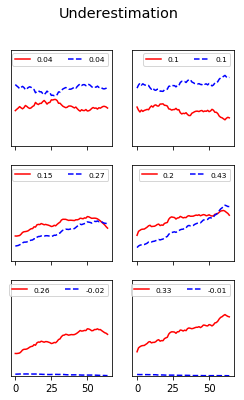

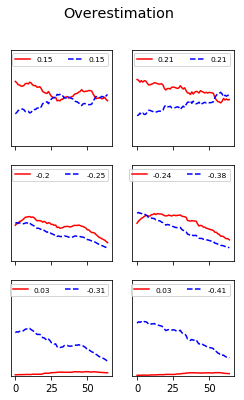

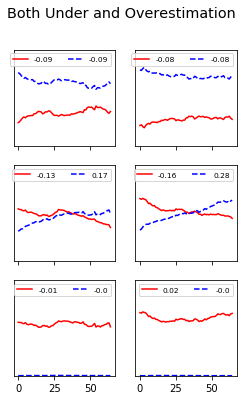

In [45]:
props = [0.5,0.75]
plot_legend_cols(data, props, add_error_under, "Underestimation", "under2.png", label=False)
plot_legend_cols(data, props, add_error_over, "Overestimation", "over2.png", label=False)
plot_legend_cols(data, props, add_error_under_over, "Both Under and Overestimation", 
                 "both2.png", label=False)
print("done")

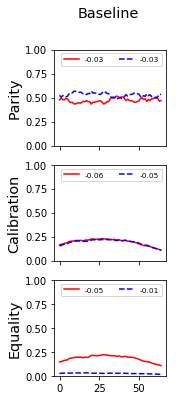

In [46]:
plot_baseline(data, "Baseline", "base.png")


done


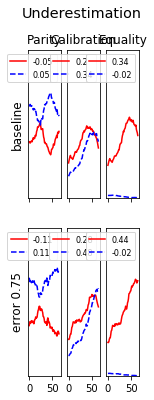

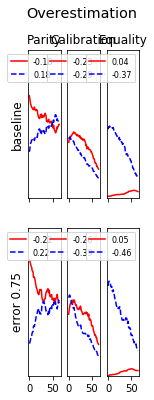

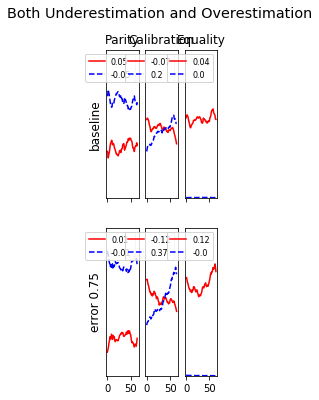

In [35]:
props = [0.5,0.75]
plot_rows(data, props, add_error_under, "Underestimation", "under_all_rows.png")
plot_rows(data, props, add_error_over, "Overestimation", "over_all_rows.png")
plot_rows(data, props, add_error_under_over, "Both Underestimation and Overestimation", 
                 "both_all_rows.png")
print("done")

In [ ]:
props = [0.1,0.5,0.75]
plot_all_one_fig_rows(data, props, add_error_under, "Underestimation", "under_all_rows.png")
plot_all_one_fig_rows(data, props, add_error_over, "Overestimation", "over_all_rows.png", label=False)
plot_all_one_fig_rows(data, props, add_error_under_over, "Both Underestimation and Overestimation", 
                 "both_all_rows.png", label=False)
print("done")